# Mencoba Animasi Coherent State menggunakan Qutip

In [2]:
from base64 import b64encode

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation
from qutip import (about, basis, coherent, destroy, displace, expect, mesolve,
                   num, plot_wigner_fock_distribution, squeeze, variance, HarmonicOscillatorWaveFunction)

%matplotlib inline

Bagian yang ada di tutorial qutip internet

In [3]:
N = 35 # dimensi Hilbert Space
w = 2 * np.pi  # oscillator frequency
tlist = np.linspace(0, 10, 101)  # periods

# operators
a = destroy(N)
n = num(N)
x = (a + a.dag()) / np.sqrt(2)
p = -1j * (a - a.dag()) / np.sqrt(2)

# the quantum harmonic oscillator Hamiltonian
H = w * a.dag() * a

c_ops = []

# uncomment to see how things change when disspation is included
# c_ops = [np.sqrt(0.25) * a]

In [4]:
# Definite the function for plotting and animation
def plot_expect_with_variance(N, op_list, op_title, states):
    """
    Plot the expectation value of an operator (list of operators)
    with an envelope that describes the operators variance.
    """

    fig, axes = plt.subplots(1, len(op_list), figsize=(14, 3))

    for idx, op in enumerate(op_list):

        e_op = expect(op, states)
        v_op = variance(op, states)

        axes[idx].fill_between(
            tlist, e_op - np.sqrt(v_op), e_op + np.sqrt(v_op), color="green",
            alpha=0.5)
        axes[idx].plot(tlist, e_op, label="expectation")
        axes[idx].set_xlabel("Time")
        axes[idx].set_title(op_title[idx])

    return fig, axes

def display_embedded_video(filename):
    video = open(filename, "rb").read()
    video_encoded = b64encode(video).decode("ascii")
    video_tag = '<video controls alt="test" \
                src="data:video/x-m4v;base64,{0}">'.format(
        video_encoded
    )
    return HTML(video_tag)

In [5]:
psi0 = coherent(N, 2.0)
result = mesolve(H, psi0, tlist, c_ops, [])


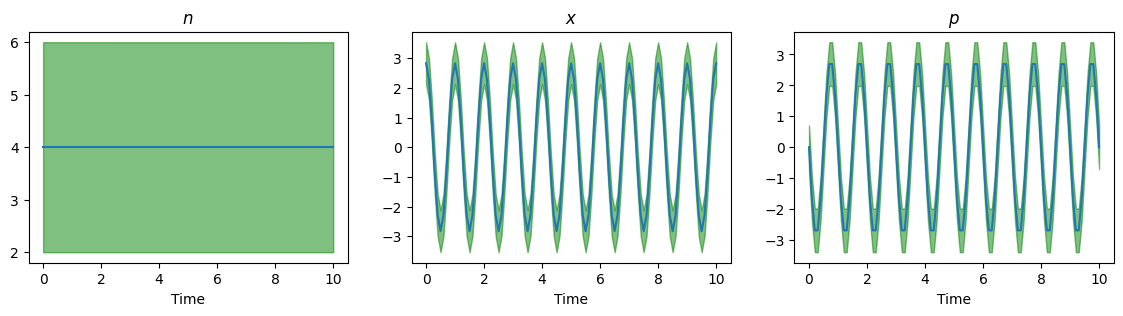

In [6]:
plot_expect_with_variance(N, [n, x, p], [r"$n$", r"$x$", r"$p$"],
                          result.states);

Bagian analisis menggunakan qutip

In [19]:
# membuat gambarnya + perhitungan secara langsung
fig = plt.figure()
plt.style.use('./style/sci.mplstyle')
def V(x):
    return 0.5 * x ** 2

xmin = -8
xmax = 9
xlst = np.linspace(xmin, xmax, 100)

for i in range(0, len(tlist)):

    ax = plt.axes(xlim = (xmin,xmax), ylim = (-0.5, 3))
    fig.suptitle(f'$t = {round(tlist[i], 2)}$')
    
    ax.plot(xlst, V(xlst), label = r'Potential $V(x)$')
    psi_x = HarmonicOscillatorWaveFunction(psi = result.states[i], omega = w, extent = [xmin, xmax])
    psi_x.data = np.abs(psi_x.data)
    psi_x.visualize(fig = fig, ax = ax)
    ax.legend(loc = "best")
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\psi(x)$')
    plt.savefig(f"./Coba/{i:03d}.png", dpi = 600)

plt.close()